In [31]:
#Importing Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [95]:
df_subject = pd.read_csv('subject-info.csv')
df_test = pd.read_csv('test_measure.csv')

df_subject.columns = df_subject.columns.str.strip().str.lower()
df_test.columns = df_test.columns.str.strip().str.lower()

df_merge = pd.merge(df_test, df_subject, on='id', how='inner')


In [ ]:
#33 Connect to database using PostgreSQL and increase the temperature 2 degrees for participant with maximum humidity and display the result 

In [25]:
max_humidity = df_subject.loc[df_subject['humidity'].idxmax()]
print(f"\nMaximum Humidity ID: {max_humidity['id']}, Humidity: {max_humidity['humidity']}")

participant_id = max_humidity['id']
print(f"\nCurrent Temperature for participant {participant_id} is {max_humidity['temperature']}")

if 'temperature' in df_subject.columns:
    df_subject.loc[df_subject['id'] == participant_id, 'temperature'] += 2  # Increase the temperature by 2 degrees
    print(f"\nTemperature for participant {participant_id} updated by 2 degrees.")
else:
    print("\n'temperature' column not found in subject-info.csv")
    
updated_temperature = df_subject[df_subject['id'] == participant_id]
print(f"\nUpdated Participant Data (ID: {participant_id}):\n", updated_temperature[['id', 'temperature']])


Maximum Humidity ID: 9, Humidity: 69.0

Current Temperature for participant 9 is 34.0

Temperature for participant 9 updated by 2 degrees.

Updated Participant Data (ID: 9):
      id  temperature
386   9         36.0


In [33]:
#34 Replace the array elements with their square values if element is an even number keep the odd number as such

In [35]:
array = np.arange(12).reshape(3, 4)

result = np.where(array % 2 == 0, array ** 2, array)

print("assumed array:")
print(array)

print("\n Changed Array:")
print(result)

assumed array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

 Changed Array:
[[  0   1   4   3]
 [ 16   5  36   7]
 [ 64   9 100  11]]


In [37]:
#35 Read 10 records from dataframe and convert into json format and print the data

In [39]:
data = {
    'Age':[10.8, 11.8, 12.2, 13.2, 13.7, 13.8, 14, 14.1, 14.1, 14.1],
    'Weight':[48.8, 41, 46, 71, 53.8, 53.4, 46, 50, 47.2, 49.7],
    'Height':[163,150, 160,190, 169.7, 171, 160, 168.9, 160.2, 160.1],
    'Humidity':[39,41,37,49,40,42,40,42,40,40],
    'Temperature':[20.7, 22.3, 21.5, 23.8, 25.3, 24.4, 25.3, 24.2, 25.2, 25.8],
    'Sex':[1,1,0,1,0,0,0,0,0,0],
    'ID':[543, 11, 829, 284, 341, 341, 343, 330, 338, 339],
    'ID_test':['543_1','11_1','829_1','284_1','341_1','341_2','343_1','330_1','338_1','339_1']
}
df = pd.DataFrame(data)

json_data = df.head(10).to_json(orient='records', indent=4)


print(json_data)

[
    {
        "Age":10.8,
        "Weight":48.8,
        "Height":163.0,
        "Humidity":39,
        "Temperature":20.7,
        "Sex":1,
        "ID":543,
        "ID_test":"543_1"
    },
    {
        "Age":11.8,
        "Weight":41.0,
        "Height":150.0,
        "Humidity":41,
        "Temperature":22.3,
        "Sex":1,
        "ID":11,
        "ID_test":"11_1"
    },
    {
        "Age":12.2,
        "Weight":46.0,
        "Height":160.0,
        "Humidity":37,
        "Temperature":21.5,
        "Sex":0,
        "ID":829,
        "ID_test":"829_1"
    },
    {
        "Age":13.2,
        "Weight":71.0,
        "Height":190.0,
        "Humidity":49,
        "Temperature":23.8,
        "Sex":1,
        "ID":284,
        "ID_test":"284_1"
    },
    {
        "Age":13.7,
        "Weight":53.8,
        "Height":169.7,
        "Humidity":40,
        "Temperature":25.3,
        "Sex":0,
        "ID":341,
        "ID_test":"341_1"
    },
    {
        "Age":13.8,
        "Weigh

In [41]:
#36 Create a barchart for HR Zone vs count and apply hatches to the bars.

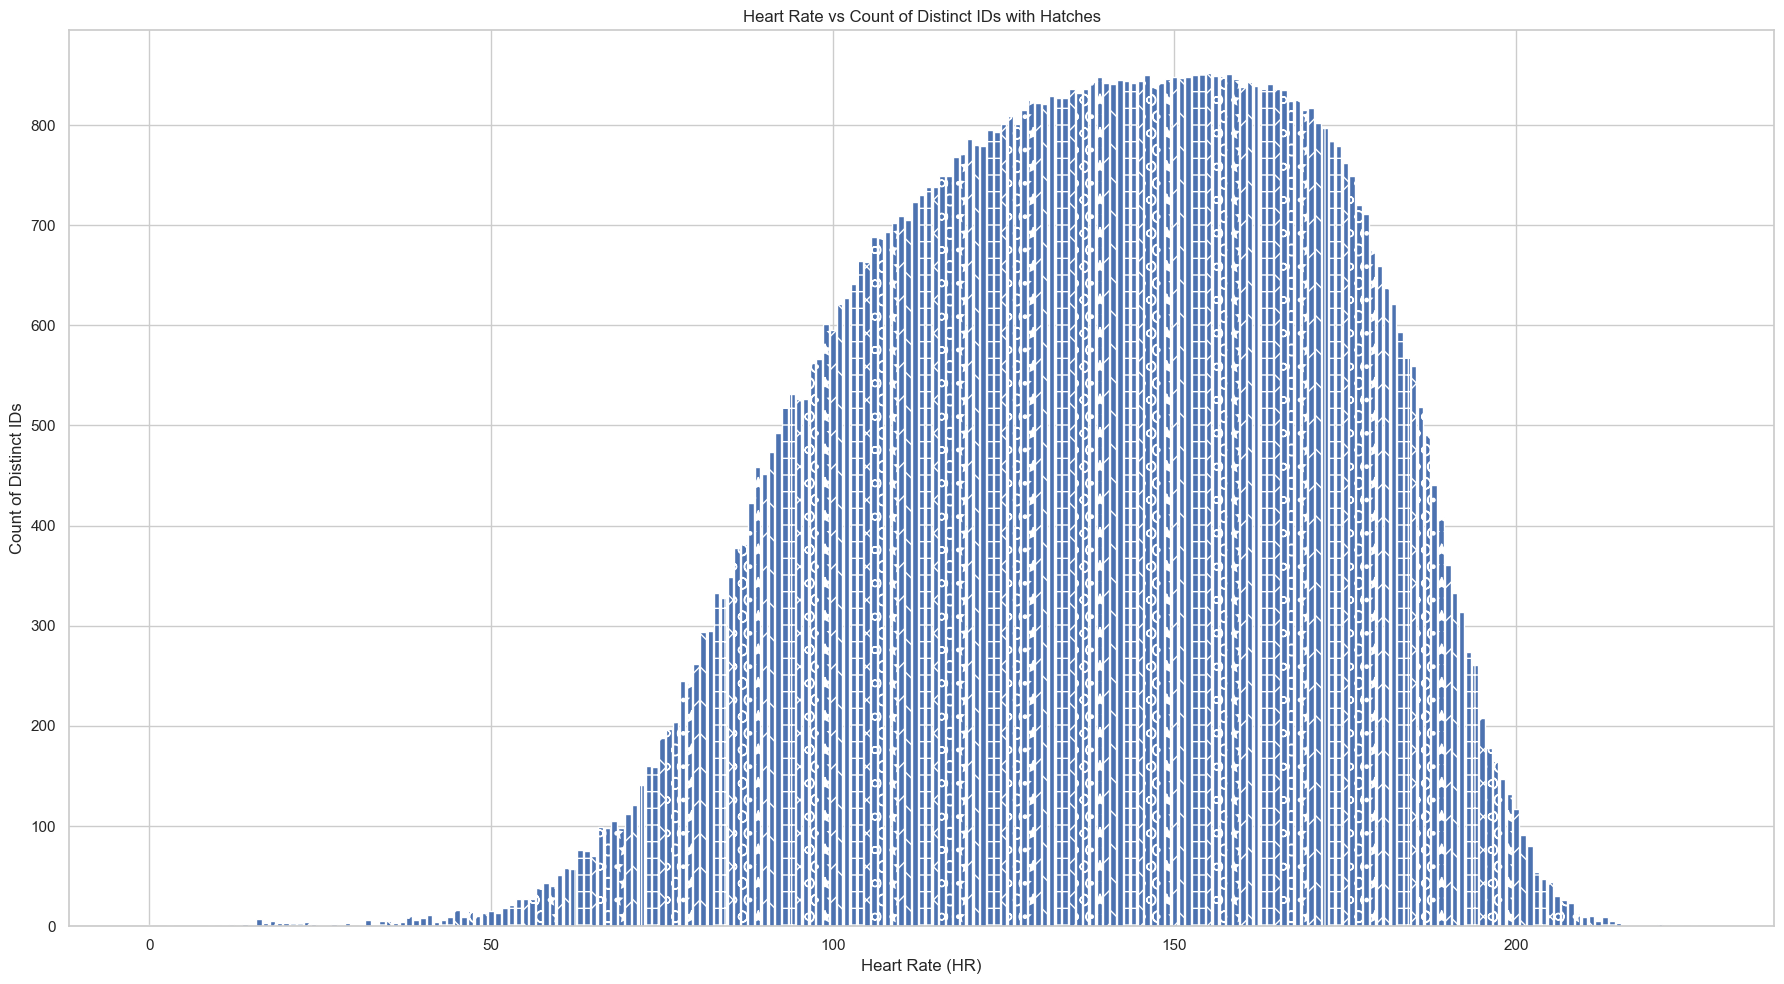

In [132]:
# Count distinct IDs per HR
hr_id_counts = df_test.groupby('hr')['id'].nunique().sort_index()

# Create bar chart with hatching
fig, ax = plt.subplots(figsize=(18, 10))
bars = ax.bar(hr_id_counts.index, hr_id_counts.values)

# Apply hatch patterns
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for i, bar in enumerate(bars):
    bar.set_hatch(hatches[i % len(hatches)])

# Labels and styling
ax.set_xlabel("Heart Rate (HR)")
ax.set_ylabel("Count of Distinct IDs")
ax.set_title("Heart Rate vs Count of Distinct IDs with Hatches")

plt.tight_layout()
plt.show()

In [45]:
#37 Who is the youngest athlete and how many tests did she take part in?

In [49]:
youngest_age = df_subject['age'].min()
youngest_athlete = df_subject[df_subject['age'] == youngest_age]
print("Youngest Athlete(s):")
print(youngest_athlete[[ 'age']])
female_df = df_subject[df_subject['sex'] == '1']  
female_tests_count = female_df.shape[0]
print(f"\nNumber of tests female athletes participated in: {female_tests_count}")

Youngest Athlete(s):
    age
0  10.8

Number of tests female athletes participated in: 0


In [51]:
#38 Plot the changes in HR and VO2 over time for each ID_test. Add a trendline to compare the HR and VO2 changes.

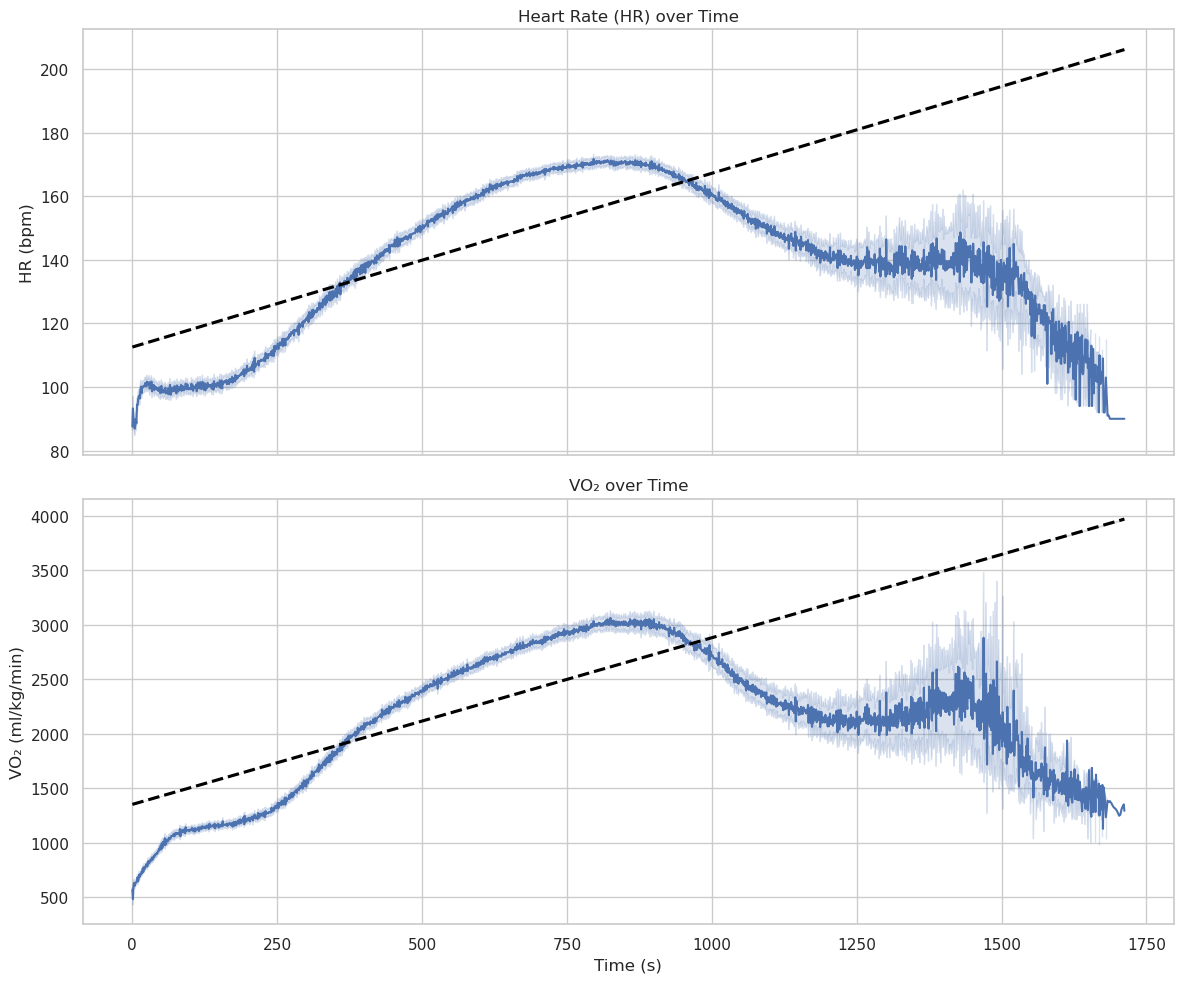

In [134]:
sns.set(style='whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot HR and VO2 with trendlines per ID_test
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot HR
sns.lineplot(data=df_test, x='time', y='hr', ax=axes[0])
sns.regplot(data=df_test, x='time', y='hr', scatter=False, ax=axes[0], color='black', line_kws={"linestyle": "--"})
axes[0].set_title("Heart Rate (HR) over Time")
axes[0].set_ylabel("HR (bpm)")

# Plot VO2
sns.lineplot(data=df_test, x='time', y='vo2', ax=axes[1])
sns.regplot(data=df_test, x='time', y='vo2', scatter=False, ax=axes[1], color='black', line_kws={"linestyle": "--"})
axes[1].set_title("VO₂ over Time")
axes[1].set_ylabel("VO₂ (ml/kg/min)")
axes[1].set_xlabel("Time (s)")

plt.tight_layout()
plt.show()

In [55]:
#39 Find the average HRV for individual athletes, using short-term variability analysis(RMSSD).

In [142]:
# Calculate RR intervals in milliseconds
df_test['rr_interval'] = 60000 / df_test['hr']

# Function to calculate RMSSD for a group
def calculate_rmssd(rr_intervals):
    rr_diff = np.diff(rr_intervals)
    return np.sqrt(np.mean(rr_diff ** 2)) if len(rr_diff) > 0 else np.nan

# Group by distinct ID and calculate RMSSD
rmssd_per_id = (
    df_test
    .sort_values(['id', 'time'])  # sort by time to keep RR order correct
    .groupby('id')['rr_interval']
    .apply(calculate_rmssd)
    .reset_index(name='rmssd')
)

# To Drop NaN results if any
#rmssd_per_id = rmssd_per_id.dropna()

# Display the result
pd.set_option('display.max_rows', 1000) # to display all the results from the given csv file
print(rmssd_per_id)

      id       rmssd
0      1         NaN
1      2         NaN
2      3    5.840448
3      4    3.504801
4      5         NaN
5      6    7.531707
6      7   33.912703
7      8         NaN
8      9    7.479931
9     10         NaN
10    11         NaN
11    12         NaN
12    13         NaN
13    14         NaN
14    15         NaN
15    16    6.253487
16    17    8.869174
17    18    8.366528
18    19         NaN
19    20         NaN
20    21    2.181457
21    22    3.692173
22    23    3.290360
23    24    6.628000
24    25    4.975546
25    26         NaN
26    27    5.906097
27    28    6.773224
28    29         NaN
29    30         NaN
30    31    4.962060
31    32    5.247670
32    33         NaN
33    34         NaN
34    35    5.115861
35    36         NaN
36    37         NaN
37    38    3.157275
38    39         NaN
39    40         NaN
40    41    2.782713
41    42    4.362724
42    43    4.287166
43    44    8.581312
44    45   68.417501
45    46   10.265629
46    47    6

In [72]:
#40 Identify the test that took the longest time to complete.

In [79]:
duration_df = df_test.groupby('id_test')['time'].agg(['min', 'max']).reset_index()
duration_df['duration'] = duration_df['max'] - duration_df['min']

# Find longest test
longest_test = duration_df.loc[duration_df['duration'].idxmax()]

print("Patient ID with the longest test duration:")
print(f"ID_test: {longest_test['id_test']}")
print(f"Duration: {longest_test['duration']} seconds")

Patient ID with the longest test duration:
ID_test: 699_1
Duration: 1712 seconds


In [81]:
#41 Perform an EDA of subject_info using YDATA Profiling.

In [144]:
profile = ProfileReport(df, title="EDA Report - Subject Info", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████| 9/9 [00:00<00:00, 1972.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [85]:
#42 How does respiration rate progress based on treadmill speed for different BMI levels? 
#   Visualize this relationship and find which BMI level has the highest mean respiration rate?

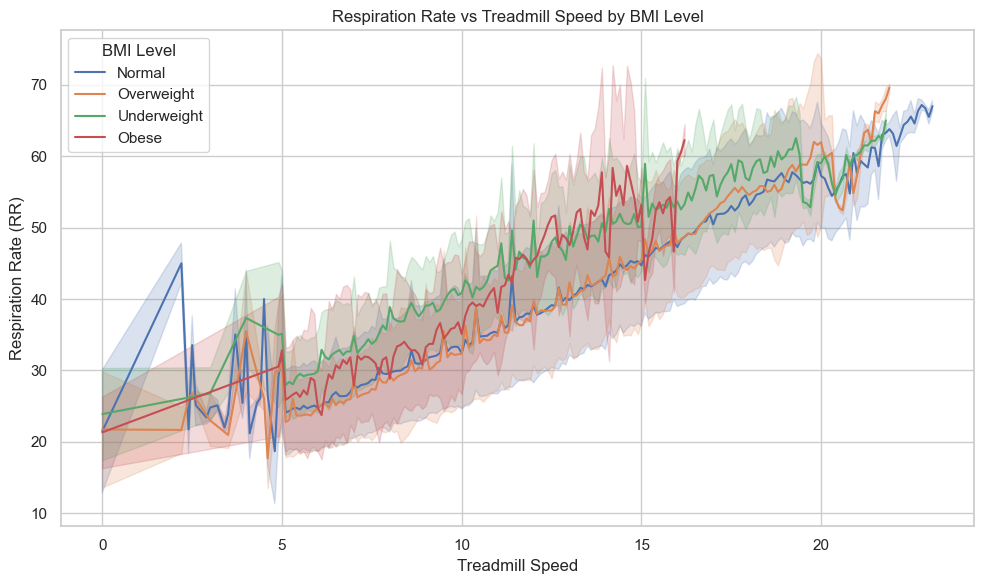

Average RR by BMI Level:
 bmi_level
Underweight    41.527322
Normal         36.947823
Overweight     35.637972
Obese          35.439317
Name: rr, dtype: float64

BMI level with highest mean RR: Underweight


In [93]:

# Calculate BMI
df_merge['height_m'] = df_merge['height'] / 100
df_merge['bmi'] = df_merge['weight'] / (df_merge['height_m'] ** 2)

# Create BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_merge['bmi_level'] = df_merge['bmi'].apply(categorize_bmi)

# Plot RR vs Speed, colored by BMI level
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_merge, x='speed', y='rr', hue='bmi_level', errorbar='sd')
plt.title("Respiration Rate vs Treadmill Speed by BMI Level")
plt.xlabel("Treadmill Speed")
plt.ylabel("Respiration Rate (RR)")
plt.legend(title="BMI Level")
plt.grid(True)
plt.tight_layout()
plt.show()

# Find BMI level with highest mean RR
mean_rr_by_bmi = df_merge.groupby('bmi_level')['rr'].mean().sort_values(ascending=False)
print("Average RR by BMI Level:\n", mean_rr_by_bmi)
print("\nBMI level with highest mean RR:", mean_rr_by_bmi.idxmax())

In [97]:
#43 Identify cases of possible bradycardia at rest and display number of athletes based on gender.


In [99]:
df_merge['sex'] = df_merge['sex'].map({1: 'Male', 0: 'Female'})

# Filter to RESTING condition (assuming speed <= 1 is resting)
resting_df = df_merge[df_merge['speed'] <= 1]

# Identify potential bradycardia cases
bradycardia_df = resting_df[resting_df['hr'] < 60]

# Get unique athletes with bradycardia at rest
bradycardia_athletes = bradycardia_df[['id', 'sex']].drop_duplicates()

# Count number of athletes by gender
count_by_gender = bradycardia_athletes['sex'].value_counts()

print("Number of athletes with bradycardia at rest by gender:\n")
print(count_by_gender)

Number of athletes with bradycardia at rest by gender:

sex
Female    83
Male      11
Name: count, dtype: int64


In [101]:
#44 Calculate the average heart rate corresponding to the speed of the treadmill and  plot a line graph to visualize the relationship.

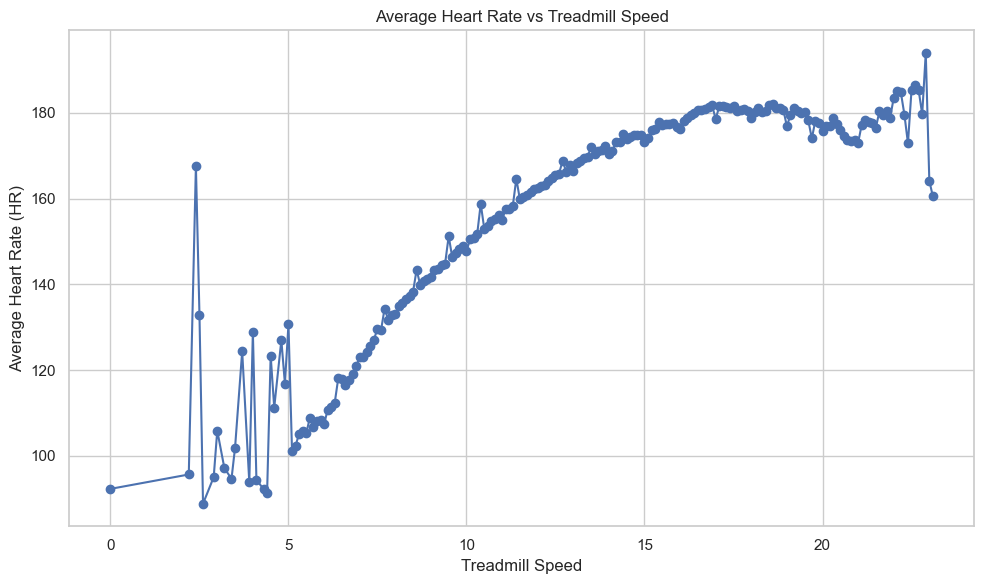

In [103]:
# Group by speed and calculate average HR
avg_hr_by_speed = df_merge.groupby('speed')['hr'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_hr_by_speed['speed'], avg_hr_by_speed['hr'], marker='o', linestyle='-')
plt.title('Average Heart Rate vs Treadmill Speed')
plt.xlabel('Treadmill Speed')
plt.ylabel('Average Heart Rate (HR)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
#45 Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend?

Average HR at different test stages:

stage
Start     106.222422
Middle    153.858723
End       163.839579
Name: hr, dtype: float64


/var/folders/ns/pr2mpxsj0vq12mcc8gdkjfl80000gn/T/ipykernel_73964/2461920917.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_hr_by_stage = df_labeled.groupby('stage')['hr'].mean()


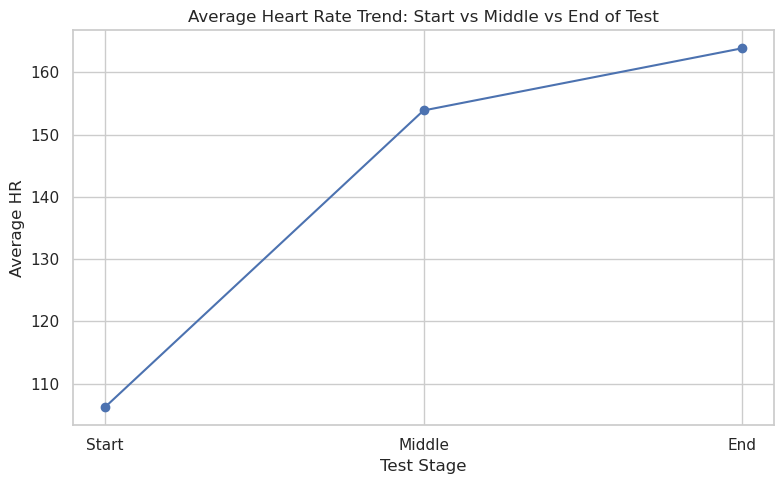

In [156]:
# Function to label each time point
def label_test_stage(df):
    # Sort by time for each test
    df = df.sort_values(by='time')
    total_time = df['time'].max()
    df['stage'] = pd.cut(
        df['time'],
        bins=[-1, total_time * 0.33, total_time * 0.66, total_time + 1],
        labels=['Start', 'Middle', 'End']
    )
    return df

# Apply the stage labeling by each test
#df_labeled = df_test.groupby('id_test').apply(label_test_stage).reset_index(drop=True)
df_labeled = df_test.groupby('id_test').apply(label_test_stage, include_groups=False).reset_index(drop=True)

# Calculate average HR for each stage
avg_hr_by_stage = df_labeled.groupby('stage')['hr'].mean()

print("Average HR at different test stages:\n")
print(avg_hr_by_stage)

avg_hr_by_stage = df_labeled.groupby('stage', observed=True)['hr'].mean()

plt.figure(figsize=(8, 5))
plt.plot(avg_hr_by_stage.index, avg_hr_by_stage.values, marker='o')
plt.title('Average Heart Rate Trend: Start vs Middle vs End of Test')
plt.xlabel('Test Stage')
plt.ylabel('Average HR')
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
#46 Find the oldest athlete in the dataset and determine the number of breaths recorded for the oldest athlete during the test.

In [111]:
oldest_age = df_subject['age'].max()
oldest_athlete = df_subject[df_subject['age'] == oldest_age]

print("Oldest athlete info:\n", oldest_athlete[['id', 'age']])

oldest_id = oldest_athlete.iloc[0]['id']
df_oldest = df_test[df_test['id'] == oldest_id]
num_breaths = df_oldest['rr'].dropna().count()

print(f"\nNumber of breaths (RR records) recorded for athlete ID {oldest_id}: {num_breaths}")

Oldest athlete info:
       id   age
991  296  63.0

Number of breaths (RR records) recorded for athlete ID 296: 345


In [113]:
#47 Assuming age is given for the current year(2025) , list the participants born on leap year

In [115]:
# Calculate year of birth
df_subject['year_of_birth'] = 2025 - df_subject['age']

# Leap year check function
def is_leap_year(year):
    return (year % 4 == 0) and (year % 100 != 0 or year % 400 == 0)

df_subject['leap_year'] = df_subject['year_of_birth'].apply(is_leap_year)

# Filter only leap-year born participants
leap_year_participants = df_subject[df_subject['leap_year']]

print("Participants born in leap years:")
print(leap_year_participants[['id', 'age', 'year_of_birth']])

Participants born in leap years:
      id   age  year_of_birth
113  177  17.0         2008.0
114  303  17.0         2008.0
115  346  17.0         2008.0
116  637  17.0         2008.0
244   83  21.0         2004.0
245  458  21.0         2004.0
246  773  21.0         2004.0
404   84  25.0         2000.0
405  183  25.0         2000.0
406  255  25.0         2000.0
407  263  25.0         2000.0
408  353  25.0         2000.0
409  391  25.0         2000.0
410  493  25.0         2000.0
555  491  29.0         1996.0
556  566  29.0         1996.0
557  857  29.0         1996.0
664  103  33.0         1992.0
665  763  33.0         1992.0
764   95  37.0         1988.0
765  196  37.0         1988.0
766  236  37.0         1988.0
767  253  37.0         1988.0
768  630  37.0         1988.0
769  632  37.0         1988.0
852  101  41.0         1984.0
853  363  41.0         1984.0
917  450  45.0         1980.0


In [117]:
#48 Use a pairplot to analyze the relationship between temperature, humidity, and  VO2 max (ml/kg/min) across different fitness levels
#   Hint :Classify ""Fitness Level"" as ""Low"" if VO2 max (ml/kg/min) is below the median, otherwise classify as ""High."

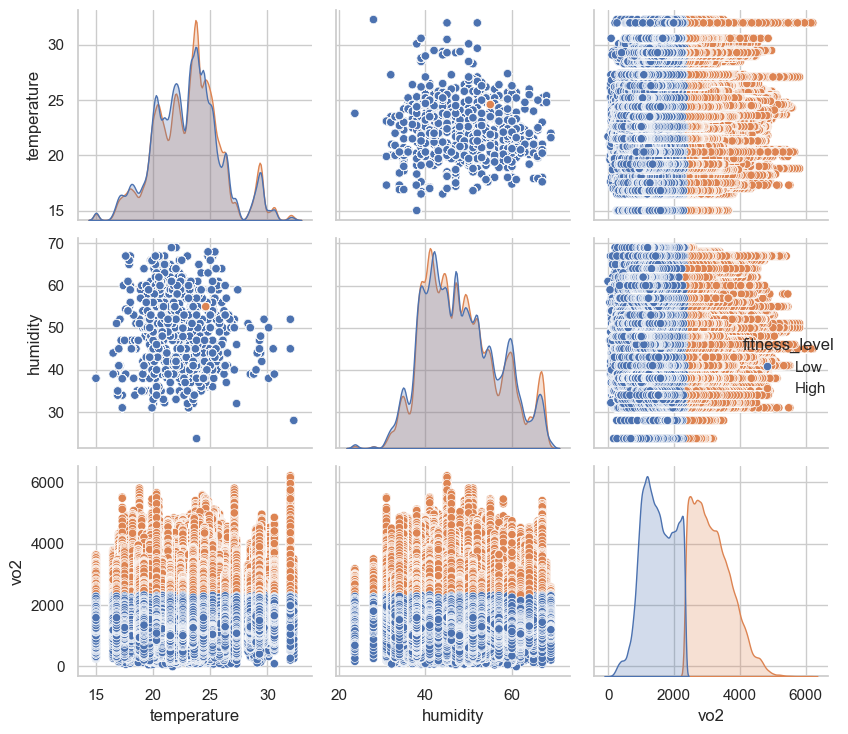

In [121]:
median_vo2max = df_merge['vo2'].median()

# Fitness level based on VO2 max
df_merge['fitness_level'] = df_merge['vo2'].apply(lambda x: 'High' if x >= median_vo2max else 'Low')

# Create a pairplot to visualize relationships (only using relevant columns)
sns.pairplot(df_merge[['temperature', 'humidity', 'vo2', 'fitness_level']], hue='fitness_level')

# Display the plot
plt.tight_layout()
plt.show()